In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:
data = pd.read_csv('/content/salary_data_cleaned.csv')
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [9]:
def salary(x):
    try:
        a = x.split('-')
        b = int(a[0].replace('$','').replace('K','')) + int((a[1].replace('$','').split("K")[0]))/2
        return b
    except:
        try:
            a = x.replace('Employer Provided Salary:','').split('-')
            b = int(a[0].replace('$','').replace('K','')) + int((a[1].replace('$','').split("K")[0]))/2
        except:
            return ""
        return b


In [10]:
data["Salary Estimate"] = data["Salary Estimate"].apply(lambda x: salary(x))

data["Salary Estimate"] = data["Salary Estimate"][data["Salary Estimate"] != ""]
data["Salary Estimate"] = data["Salary Estimate"].astype(float)
data["Salary Estimate"]

0       98.5
1      119.0
2      125.0
3      104.5
4      157.5
       ...  
737    113.5
738    138.5
739    101.5
740    175.0
741    124.0
Name: Salary Estimate, Length: 742, dtype: float64

In [11]:
data.describe()

,Salary Estimate,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel
count,718.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,141.089833,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911
std,52.067116,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812
min,23.000000,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103.625000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,134.000000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,170.000000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,355.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
print("There are {} entries in the dataset.".format(data.shape[0]))
print("There are {} companies in the dataset.".format(data['Company Name'].nunique()))
print("There are {} job titles in the dataset.".format(data['Job Title'].nunique()))
print("There are {} locations in the dataset.".format(data['Location'].nunique()))
print("There are {} industries in the dataset.".format(data['Industry'].nunique()))
print("There are {} sectors in the dataset.".format(data['Sector'].nunique()))


There are 742 entries in the dataset.
There are 343 companies in the dataset.
There are 264 job titles in the dataset.
There are 200 locations in the dataset.
There are 60 industries in the dataset.
There are 25 sectors in the dataset.


In [13]:
## Feature Engineering
# Company Name Text Only
data['Company Name'] = data['Company Name'].apply(lambda x: x.split('\n')[0])

In [14]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 996.1 kB/s eta 0:00:00


In [15]:
# Converting categrical data to numerical data
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Job Title', 'Location', 'Company Name', 'Industry', 'Sector'])
data = encoder.fit_transform(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    int64  
 1   Salary Estimate    718 non-null    float64
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    int64  
 5   Location           742 non-null    int64  
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    int64  
 11  Sector             742 non-null    int64  
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

In [16]:
data = data.drop(['Job Description','Type of ownership','excel','spark','Company Name','Location','Founded','Competitors','Industry','hourly','employer_provided',
'company_txt','job_state','python_yn','R_yn','aws'], axis=1)

In [17]:
data.head()

,Job Title,Salary Estimate,Rating,Headquarters,Size,Sector,Revenue,min_salary,max_salary,avg_salary,same_state,age
0,1,98.5,3.8,"Goleta, CA",501 to 1000 employees,1,$50 to $100 million (USD),53,91,72.0,0,47
1,2,119.0,3.4,"Baltimore, MD",10000+ employees,2,$2 to $5 billion (USD),63,112,87.5,0,36
2,1,125.0,4.8,"Clearwater, FL",501 to 1000 employees,3,$100 to $500 million (USD),80,90,85.0,1,10
3,1,104.5,3.8,"Richland, WA",1001 to 5000 employees,4,$500 million to $1 billion (USD),56,97,76.5,1,55
4,1,157.5,2.9,"New York, NY",51 to 200 employees,3,Unknown / Non-Applicable,86,143,114.5,1,22


In [18]:
data['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [19]:
def Size(x):
    if x == '1 to 50 employees':
        return (1+50)/2
    elif x == '51 to 200 employees':
        return (51+200)/2
    elif x == '201 to 500 employees':
        return (201+500)/2
    elif x == '501 to 1000 employees':
        return (501+1000)/2
    elif x == '1001 to 5000 employees':
        return (1001+5000)/2
    elif x == '5001 to 10000 employees':
        return (5001+10000)/2
    elif x == '10000+ employees':
        return 10000
    else:
        return ""


In [20]:
# Feature Engineering
data['Size'] = data['Size'].apply(lambda x: Size(x))
data['Size'] = data['Size'][data['Size'] != ""]
data['Size'] = data['Size'].astype(float)


In [21]:
# Converting categrical data to numerical data
encoder = ce.OrdinalEncoder(cols=['Headquarters'])
data = encoder.fit_transform(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        742 non-null    int64  
 1   Salary Estimate  718 non-null    float64
 2   Rating           742 non-null    float64
 3   Headquarters     742 non-null    int64  
 4   Size             732 non-null    float64
 5   Sector           742 non-null    int64  
 6   Revenue          742 non-null    object 
 7   min_salary       742 non-null    int64  
 8   max_salary       742 non-null    int64  
 9   avg_salary       742 non-null    float64
 10  same_state       742 non-null    int64  
 11  age              742 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 69.7+ KB


In [22]:
data['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [23]:
def Revenue(x):
    if x == 'Unknown / Non-Applicable':
        return 0
    elif x == '$1 to $2 billion (USD)':
        return (1+2)/2
    elif x == '$2 to $5 billion (USD)':
        return (2+5)/2
    elif x == '$5 to $10 billion (USD)':
        return (5+10)/2
    elif x == '$10+ billion (USD)':
        return 10
    elif x == '$100 to $500 million (USD)':
        return (100+500)/2
    elif x == '$500 million to $1 billion (USD)':
        return (500+1000)/2
    elif x == '$50 to $100 million (USD)':
        return (50+100)/2
    elif x == '$10 to $25 million (USD)':
        return (10+25)/2
    elif x == '$25 to $50 million (USD)':
        return (25+50)/2
    elif x == '$5 to $10 million (USD)':
        return (5+10)/2
    elif x == '$1 to $5 million (USD)':
        return (1+5)/2
    else:
        return ""

In [24]:
# Feature Engineering
data['Revenue'] = data['Revenue'].apply(lambda x: Revenue(x))
data['Revenue'] = data['Revenue'][data['Revenue'] != ""]
data['Revenue'] = data['Revenue'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        742 non-null    int64  
 1   Salary Estimate  718 non-null    float64
 2   Rating           742 non-null    float64
 3   Headquarters     742 non-null    int64  
 4   Size             732 non-null    float64
 5   Sector           742 non-null    int64  
 6   Revenue          737 non-null    float64
 7   min_salary       742 non-null    int64  
 8   max_salary       742 non-null    int64  
 9   avg_salary       742 non-null    float64
 10  same_state       742 non-null    int64  
 11  age              742 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 69.7 KB


In [25]:
data.isnull().sum()

Job Title           0
Salary Estimate    24
Rating              0
Headquarters        0
Size               10
Sector              0
Revenue             5
min_salary          0
max_salary          0
avg_salary          0
same_state          0
age                 0
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.head()

,Job Title,Salary Estimate,Rating,Headquarters,Size,Sector,Revenue,min_salary,max_salary,avg_salary,same_state,age
0,1,98.5,3.8,1,750.5,1,75.0,53,91,72.0,0,47
1,2,119.0,3.4,2,10000.0,2,3.5,63,112,87.5,0,36
2,1,125.0,4.8,3,750.5,3,300.0,80,90,85.0,1,10
3,1,104.5,3.8,4,3000.5,4,750.0,56,97,76.5,1,55
4,1,157.5,2.9,5,125.5,3,0.0,86,143,114.5,1,22


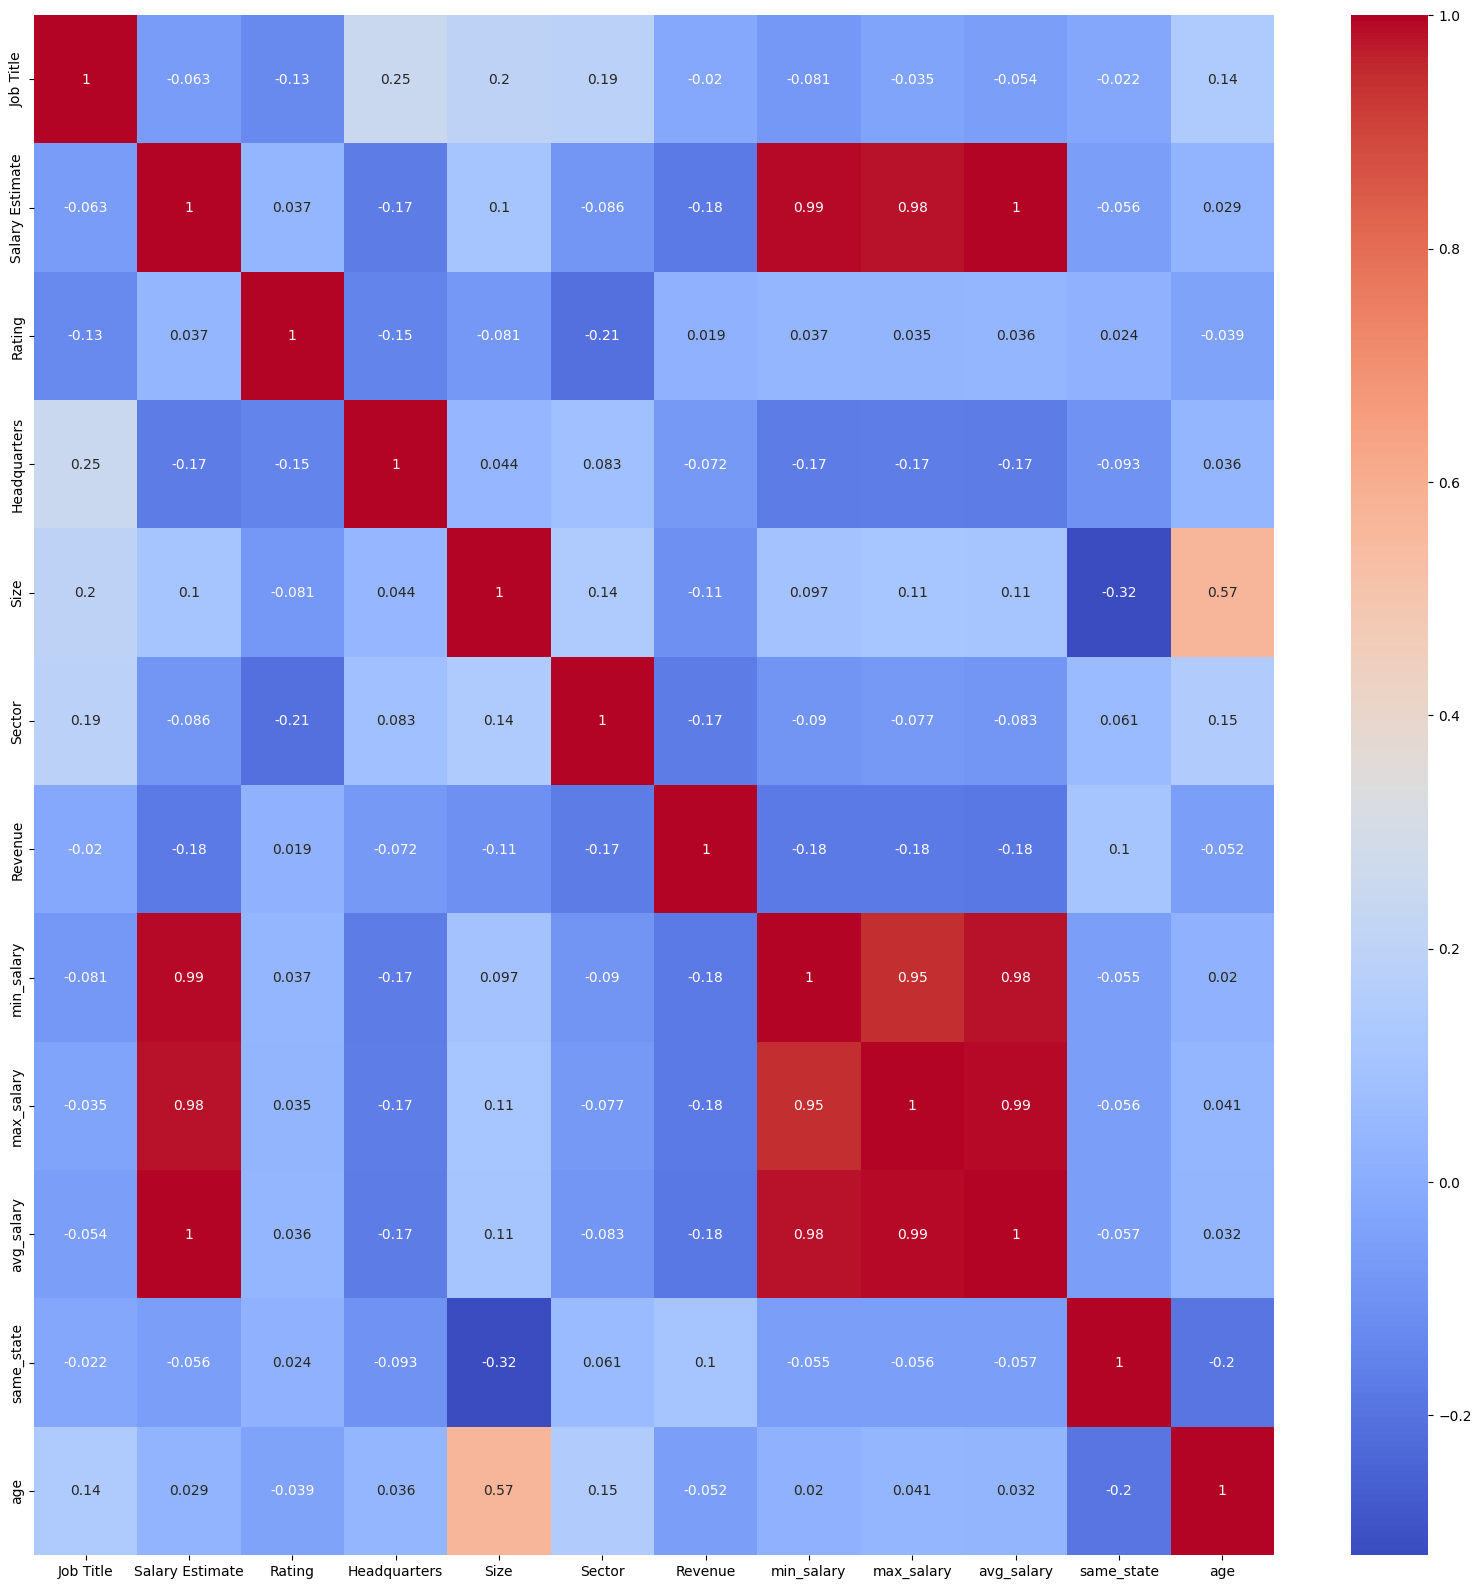

In [28]:
# corelation matrix with heatmap
data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

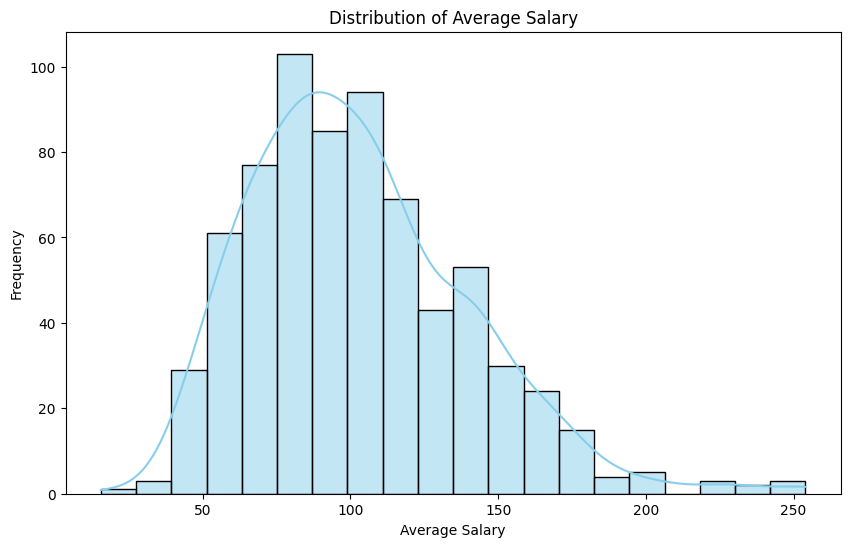

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Average Salary
plt.figure(figsize=(10, 6))
sns.histplot(data['avg_salary'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

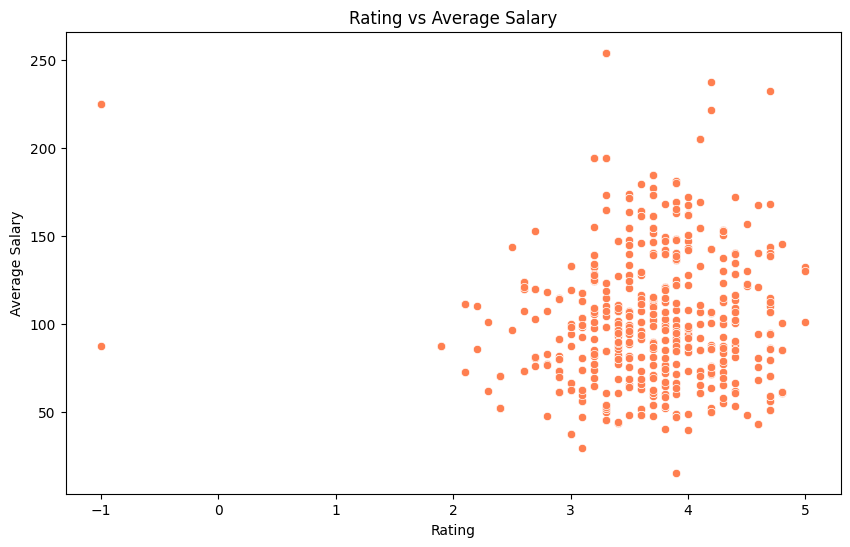

In [34]:
# Scatter Plot: Rating vs Average Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='avg_salary', data=data, color='coral')
plt.title('Rating vs Average Salary')
plt.xlabel('Rating')
plt.ylabel('Average Salary')
plt.show()


<ipython-input-35-776df03109ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sector', y='avg_salary', data=data, palette='viridis')


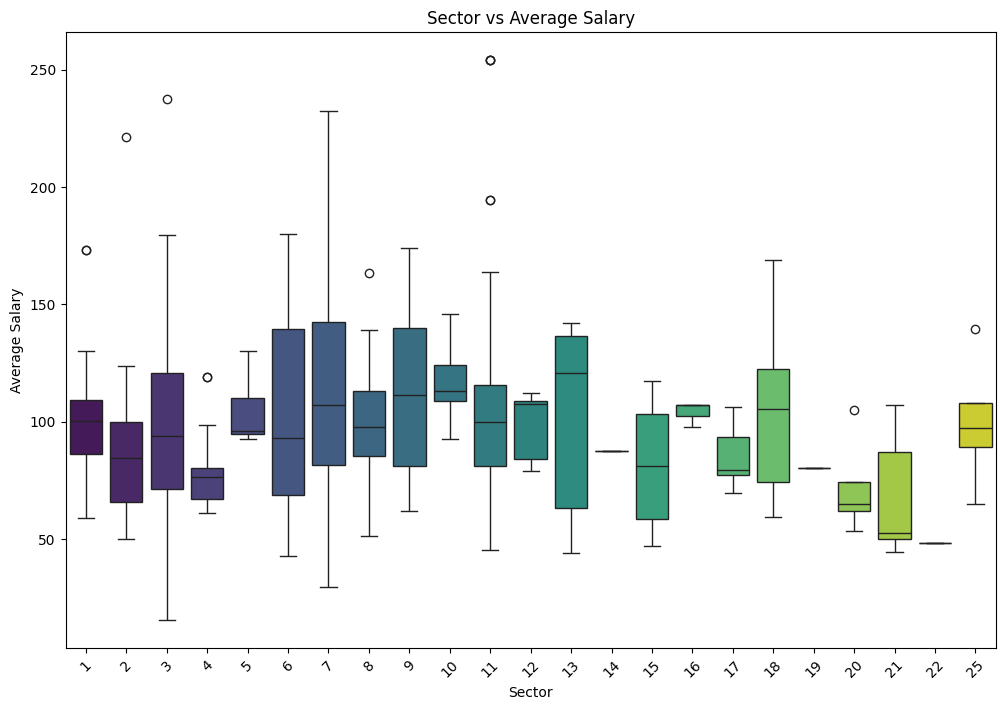

In [35]:
# Box Plot: Sector vs Average Salary
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sector', y='avg_salary', data=data, palette='viridis')
plt.title('Sector vs Average Salary')
plt.xlabel('Sector')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Splitting the data
X = data.drop('Salary Estimate', axis=1)
y = data['Salary Estimate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 4.048417785493514e-13


In [32]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))


Mean Absolute Error: 0.8941273584905663


In [33]:
# Assuming that rf is a trained RandomForest model,
# X_test is the test dataset features, and y_test is the actual labels

# Predict the salaries for the first 5 instances in the test set
results = rf.predict(X_test[:5])

# Print the predicted salaries
print("Predicted Salaries: ", results)

# Print the actual salaries for the first 5 instances in the test set
print("Actual Salaries: ", y_test[:5].values)


Predicted Salaries:  [ 93.825 104.805 155.575 119.13  249.665]
Actual Salaries:  [ 96.5 105.  156.5 119.5 250. ]
